# Import needed Python Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
cancer

# Let's view the data in a dataframe.

In [0]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Explore Our Dataset

In [0]:
df_cancer.shape

(569, 31)

As we can see,we have 596 rows (Instances) and 31 columns(Features)

In [0]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Above is the name of each columns in our dataframe.

# The next step is to Visualize our data

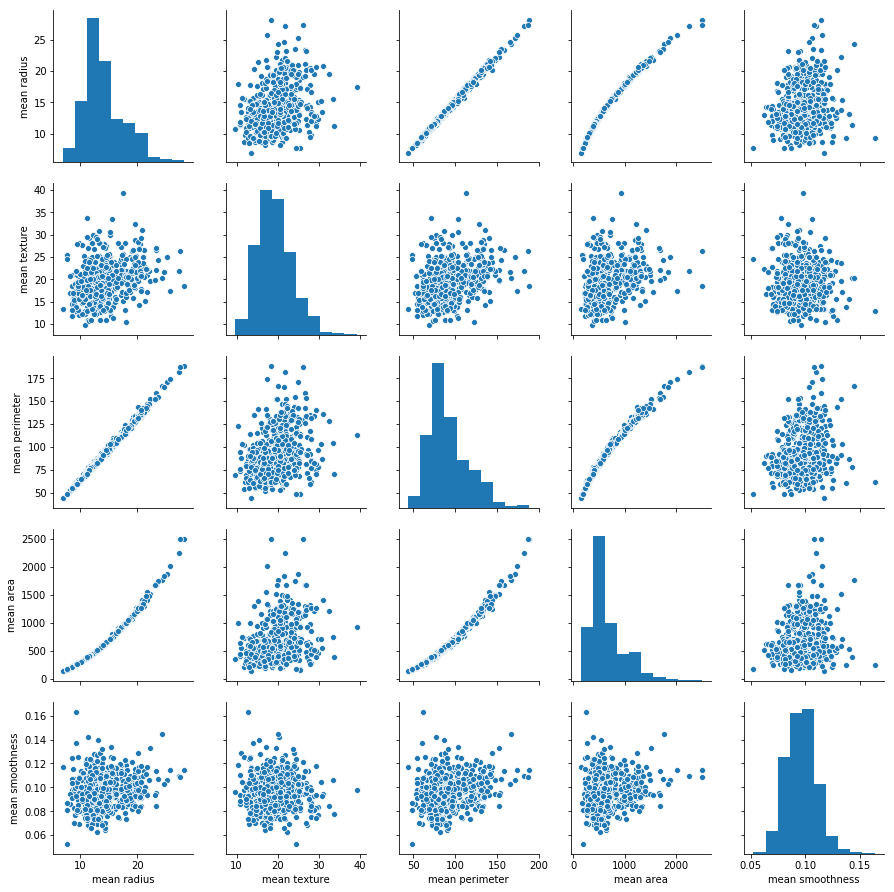

In [0]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

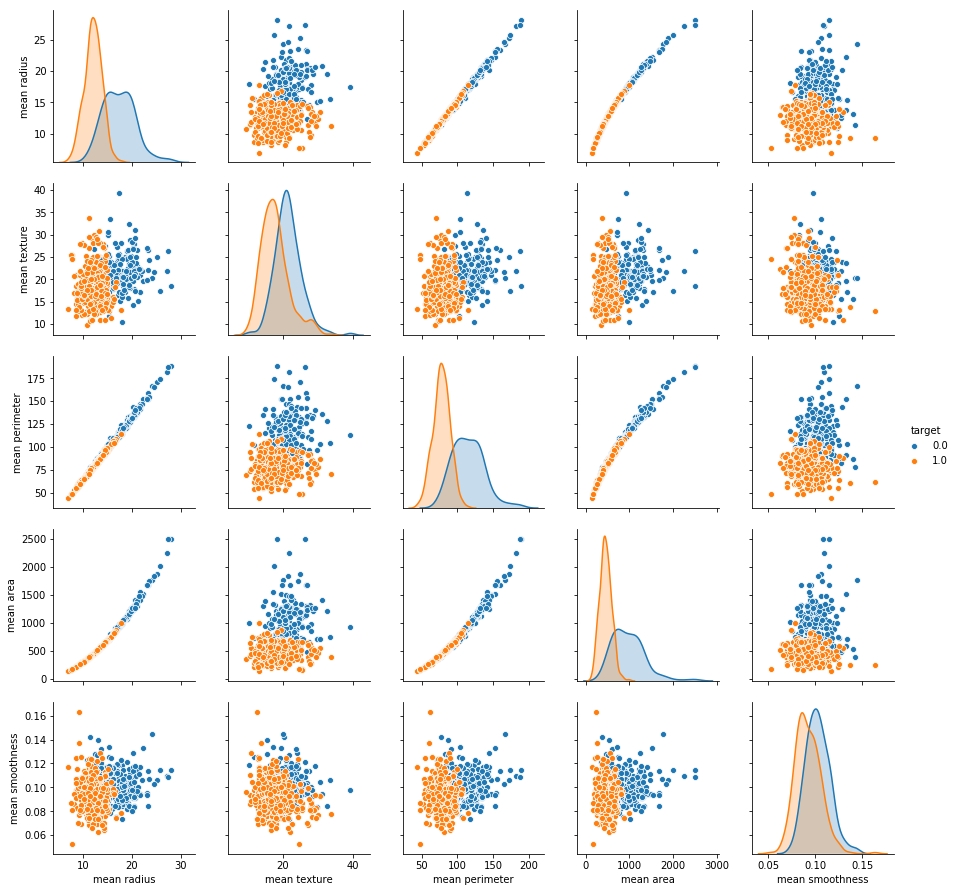

In [0]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

# How many Benign and Malignant do we have in our dataset?

In [0]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

 Let's visulaize our counts

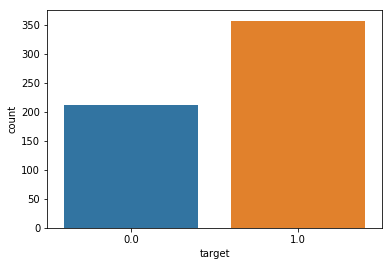

In [0]:
sns.countplot(df_cancer['target'], label = "Count") 

# Let's check the correlation between our features 

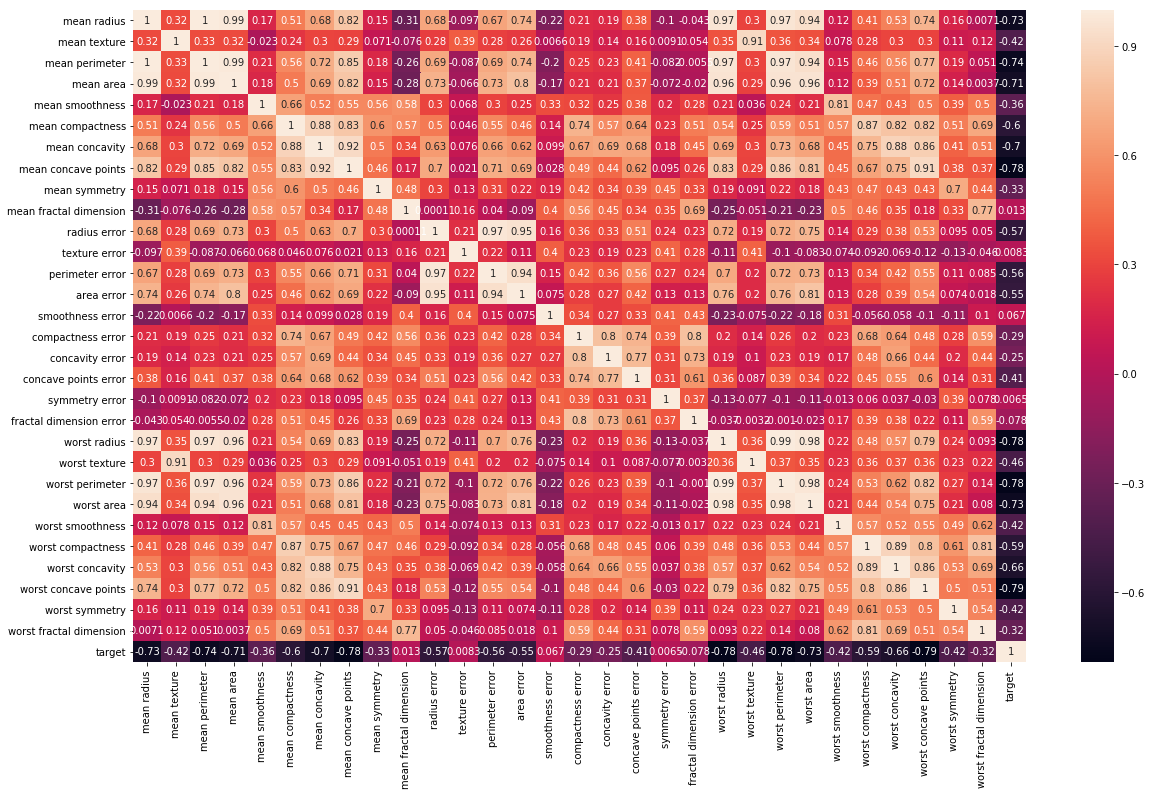

In [0]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

![alt text](https://)There is a strong correlation between the mean radius and mean perimeter, mean area and mean primeter

# Model Training

In [0]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# Create the training and testing data

In [0]:
from sklearn.model_selection import train_test_split

Let's split our data using 80% for training and the remaining 20% for testing.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [0]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)


The size of our testing "X" (input features) is (114, 30)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


# Import Support Vector Machine (SVM) Model 

In [0]:
from sklearn.svm import SVC

In [0]:
svc_model = SVC()

# Now, let's train our SVM model with our "training" dataset.

In [0]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Let's use our trained model to make a prediction using our testing data

In [0]:
y_predict = svc_model.predict(X_test)

<a id='confusion-matrix'></a>

## The confusion matrix

---

The confusion matrix is a table representing the performance of your model to classify labels correctly.


In [0]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [0]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,48,0


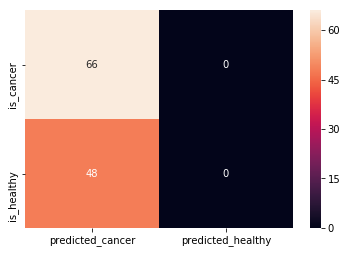

In [0]:
sns.heatmap(confusion, annot=True)

In [0]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Improving our Model

The first process we will try is by Normalizing our data

Data Normalization is a feature scaling process that brings all values into range [0,1]

X' = (X-X_min) / (X_max - X_min)-----> X_range

# Normalize Training Data

In [0]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [0]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [0]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [0]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,0.002571,0.181621,0.019648,0.000000,0.129245,0.183916,0.094318,0.097140,0.163618,0.127420,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,0.881948,0.209026,0.843095,1.000000,0.201822,0.386698,0.203409,0.492139,0.127878,0.126556,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,0.033750,0.026498,0.029025,0.019514,0.071897,0.037372,0.017874,0.096174,0.037401,0.027714,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,0.043744,0.281957,0.039533,0.028088,0.125846,0.086055,0.054369,0.224095,0.164744,0.031687,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,0.105667,0.158637,0.101117,0.055618,0.273855,0.217863,0.127551,0.377344,0.308550,0.072800,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


# Normalize Training Data

In [0]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [0]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

#CART (Classification And Regression Trees)


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics


clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train)  
y_pred = clf.predict(X_test)



print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


#Decision Trees

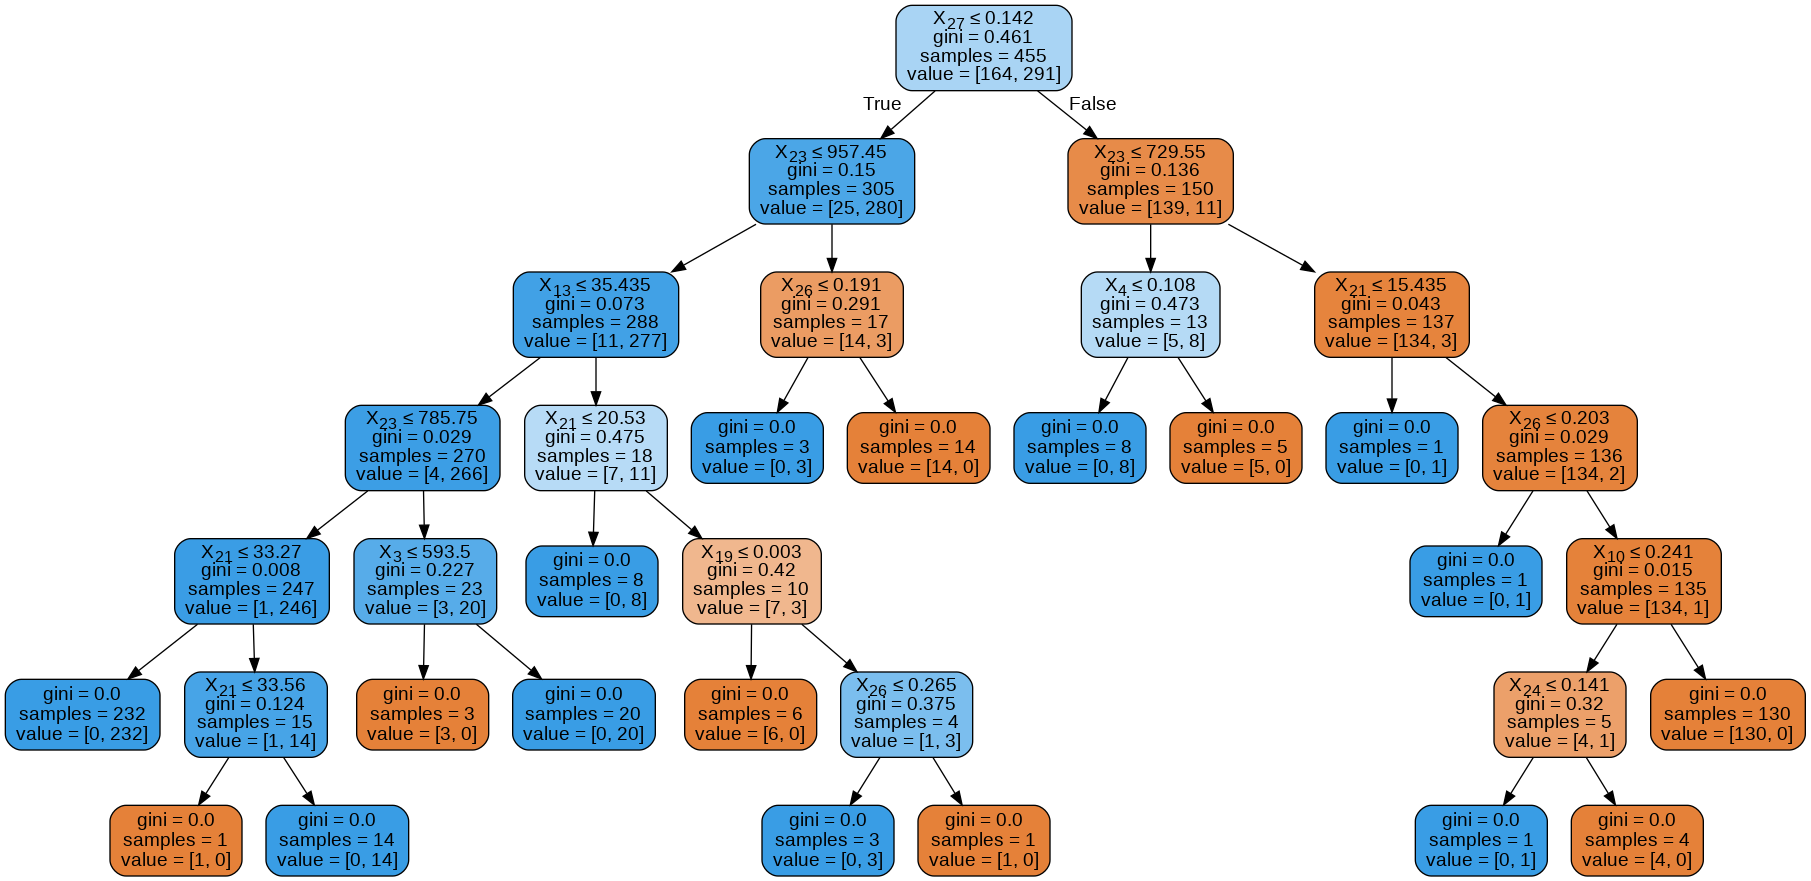

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('brestcancer.png')
Image(graph.create_png())

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


# Classifiction Report


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        48
         1.0       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



# Perceptron


In [0]:
from sklearn.linear_model import Perceptron
pn = Perceptron(tol=1e-3, random_state=0)
pn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
pn.score(X_train,y_train)

0.9010989010989011

In [0]:
pn.score(X_test,y_test)

0.8947368421052632

#Nueral Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [0]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
y_test_cat=to_categorical(y_test)
y_train_cat=to_categorical(y_train)
model.fit(X_train, y_train_cat, epochs=150, batch_size=10)

Epoch 1/150
455/455 [==============================] - 0s 866us/step - loss: 2.7539 - acc: 0.7714
Epoch 2/150
455/455 [==============================] - 0s 187us/step - loss: 2.2457 - acc: 0.7978
Epoch 3/150
455/455 [==============================] - 0s 157us/step - loss: 2.1433 - acc: 0.8088
Epoch 4/150
455/455 [==============================] - 0s 166us/step - loss: 1.7065 - acc: 0.8352
Epoch 5/150
455/455 [==============================] - 0s 150us/step - loss: 1.6346 - acc: 0.8637
Epoch 6/150
455/455 [==============================] - 0s 146us/step - loss: 1.7660 - acc: 0.8527
Epoch 7/150
455/455 [==============================] - 0s 154us/step - loss: 1.5233 - acc: 0.8593
Epoch 8/150
455/455 [==============================] - 0s 140us/step - loss: 1.5317 - acc: 0.8615
Epoch 9/150
455/455 [==============================] - 0s 149us/step - loss: 1.5795 - acc: 0.8725
Epoch 10/150
455/455 [==============================] - 0s 149us/step - loss: 1.7480 - acc: 0.8527
Epoch 11/150
455/45

**Training Accuracy**

In [0]:
_, accuracy = model.evaluate(X_train, y_train_cat)
print('Accuracy: %.2f' % (accuracy*100))

455/455 [==============================] - 0s 35us/step
Accuracy: 93.41


**Testing Accuracy**

In [0]:
_, accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

114/114 [==============================] - 0s 102us/step
Accuracy: 91.23


#Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [0]:
print(classifier.score(X_test, y_test))

0.9824561403508771


# SVM with Normalized data

In [0]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


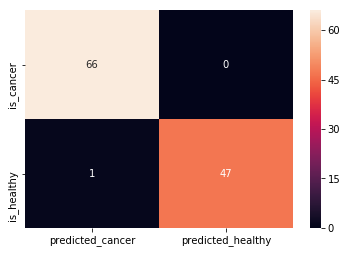

In [0]:
sns.heatmap(confusion,annot=True,fmt="d")

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Awesome performance! We only have 1 false prediction.**